In [29]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Load dataset
df = pd.read_csv('/Users/deadrienhill/Downloads/superheroes_nlp_dataset.csv')

# Define baseline
baseline = df.strength_score.mean()

# Define preprocessing functions
def basic_clean(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    stopword_list = stopwords.words('english')
    words = [word for word in tokens if word not in stopword_list]
    return words

def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    lemms = [lemmatizer.lemmatize(word) for word in words]
    return lemms

# Preprocess history_text
df['processed_text'] = df['history_text'].astype(str).apply(basic_clean)
df['tokens'] = df['processed_text'].apply(tokenize)
df['tokens'] = df['tokens'].apply(remove_stopwords)
df['tokens'] = df['tokens'].apply(lemmatize)
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Split the data into training, validation, and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=123)
train, val = train_test_split(train, test_size=0.2, random_state=123)

# Vectorize the text using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['processed_text'])
X_val = vectorizer.transform(val['processed_text'])
X_test = vectorizer.transform(test['processed_text'])
y_train = train['strength_score']
y_val = val['strength_score']
y_test = test['strength_score']

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set and compare with baseline
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE: ", rmse)
print("Baseline: ", baseline)



RMSE:  29.4450898987045
Baseline:  39.45862068965517


In [2]:
y_test = pd.DataFrame(y_test)

In [3]:
y_test['predictions'] = y_pred

In [4]:
y_test['baseline'] = baseline

In [5]:
y_test

,strength_score,predictions,baseline
802,0,52.831993,39.458621
1315,80,59.132593,39.458621
1035,35,29.110167,39.458621
529,35,33.157176,39.458621
167,15,0.953554,39.458621
...,...,...,...
346,5,36.585520,39.458621
1259,10,26.224385,39.458621
705,40,17.558944,39.458621
680,30,18.386022,39.458621


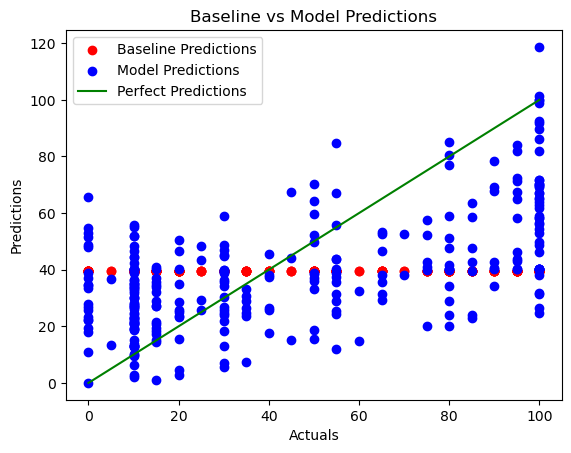

In [7]:
# Create a scatter plot of actuals vs baseline predictions
actuals = y_test['strength_score']
predictions = y_test['predictions']
baseline = y_test['baseline']

plt.scatter(actuals, baseline, color='red', label='Baseline Predictions')

# Create a scatter plot of actuals vs model predictions
plt.scatter(actuals, predictions, color='blue', label='Model Predictions')

# Add a diagonal line representing perfect predictions
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='green', label='Perfect Predictions')

# Add labels for the x-axis, y-axis, and plot title
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Baseline vs Model Predictions')

# Add a legend
plt.legend()

# Show the plot
plt.show()


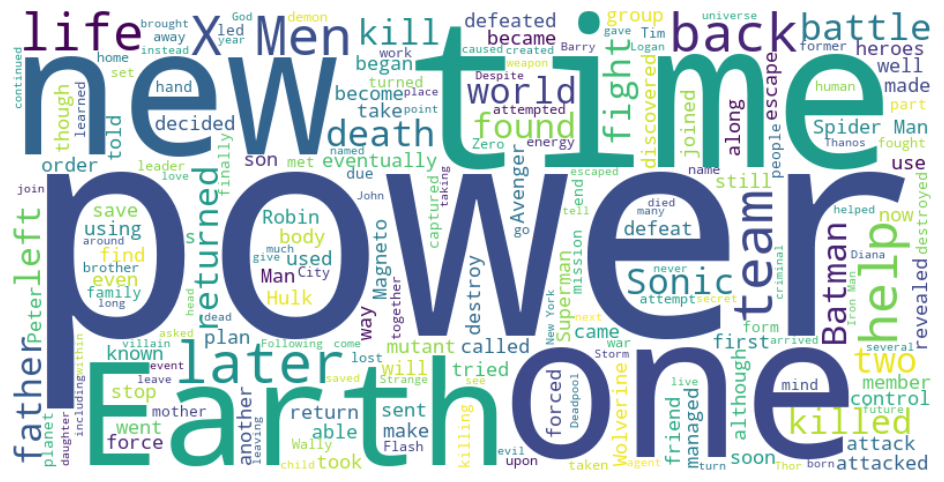

In [15]:
# Create a word cloud of superhero names
text = ' '.join(df['history_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
